# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Intan Fadhilah
- **Email:** m011b4kx1986@bangkit.academy
- **ID Dicoding:** m011b4kx1986

## Menentukan Pertanyaan Bisnis

- What was the trend in the number of bicycle users from January to December 2011?
- What is the difference in the trend of bicycle users between casual users and registered users throughout 2011?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np

## Data Wrangling

### Gathering Data

In [4]:
#Read Data Monthly User
monthly_df = pd.read_csv("https://raw.githubusercontent.com/m011b4kx1986/project-bike/main/data/monthly_user.csv", delimiter=",")
monthly_df.head()

,instant,dteday,mnth,cnt
0,1,1/1/2011,1,985
1,2,1/2/2011,1,801
2,3,1/3/2011,1,1349
3,4,1/4/2011,1,1562
4,5,1/5/2011,1,1600


In [5]:
#Read Data User Category
category_df = pd.read_csv("https://raw.githubusercontent.com/m011b4kx1986/project-bike/main/data/user_category.csv", delimiter=",")
category_df.head()

,instant,dteday,mnth,casual,registered
0,1,1/1/2011,1,331,654
1,2,1/2/2011,1,131,670
2,3,1/3/2011,1,120,1229
3,4,1/4/2011,1,108,1454
4,5,1/5/2011,1,82,1518


**Insight:**
- The first analysis requires monthly data and the number of bike users for the year 2011.
- The second analysis requires monthly data on casual and registered bike users for the year 2011.

### Assessing Data

####Menilai tabel `monthly_df`


In [6]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   instant  365 non-null    int64 
 1   dteday   365 non-null    object
 2   mnth     365 non-null    int64 
 3   cnt      365 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


In [7]:
#Checking for Missing Values
monthly_df.isnull().sum()

,0
instant,0
dteday,0
mnth,0
cnt,0


In [9]:
#Checking for Duplicate Data
print("Count of duplicate data:", monthly_df.duplicated().sum())

Count of duplicate data: 0


In [10]:
#Checking for Outlier
data_monthly = monthly_df['cnt'].values

#Calculating Quartile
q25, q75 = np.percentile(monthly_df['cnt'], [25, 75])
iqr = q75 - q25
cutoff = iqr * 1.5
minimum, maximum = q25 - cutoff, q75 + cutoff

outliers = [x for x in data_monthly if x < minimum or x > maximum]
print("Outliers:", outliers)
print("Jumlah Outliers:", len(outliers))

Outliers: []
Jumlah Outliers: 0


####Menilai tabel `category_df`

In [12]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     731 non-null    int64 
 1   dteday      731 non-null    object
 2   mnth        731 non-null    int64 
 3   casual      731 non-null    int64 
 4   registered  731 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 28.7+ KB


In [14]:
#Checking for Missing Values
category_df.isnull().sum()

,0
instant,0
dteday,0
mnth,0
casual,0
registered,0


In [15]:
#Checking for Duplicate Data
print("Count of duplicate data:", category_df.duplicated().sum())

Count of duplicate data: 0


**Insight:**
- The process of identifying issues in the data to ensure data quality.
- The issues analyzed include Missing Values, Duplicate Data, and Outliers.
- The results of the analysis indicate that the data has no issues in these three parameters; no outliers were found because the minimum and maximum limits were not significant.

### Cleaning Data

**Insight:**
- No data cleaning was performed because the analysis results indicate that the data has no issues.

## Exploratory Data Analysis (EDA)

### Explore monthly_df

In [18]:
monthly_df.sample(5)

,instant,dteday,mnth,cnt
107,108,4/18/2011,4,3429
55,56,2/25/2011,2,1461
105,106,4/16/2011,4,795
357,358,12/24/2011,12,1011
299,300,10/27/2011,10,2659


In [17]:
#Viewing a summary of statistical parameters
monthly_df.describe(include="all")

,instant,dteday,mnth,cnt
count,365.000000,365,365.000000,365.000000
unique,NaN,365,NaN,NaN
top,NaN,1/1/2011,NaN,NaN
freq,NaN,1,NaN,NaN
mean,183.000000,NaN,6.526027,3405.761644
std,105.510663,NaN,3.452584,1378.753666
min,1.000000,NaN,1.000000,431.000000
25%,92.000000,NaN,4.000000,2132.000000
50%,183.000000,NaN,7.000000,3740.000000
75%,274.000000,NaN,10.000000,4586.000000


In [27]:
monthly_df.groupby(by='mnth')['cnt'].agg([
    'sum', 'max', 'min', 'mean', 'std'])

,sum,max,min,mean,std
mnth,,,,,
1,38189,1985,431,1231.903226,372.432665
2,48215,2927,1005,1721.964286,398.508839
3,64045,3239,605,2065.967742,550.971716
4,94870,5312,795,3162.333333,1042.093593
5,135821,5805,2633,4381.322581,572.927883
6,143512,5515,3767,4783.733333,444.447812
7,141341,6043,3285,4559.387097,680.090762
8,136691,5895,1115,4409.387097,809.852401
9,127418,5423,1842,4247.266667,965.377251


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

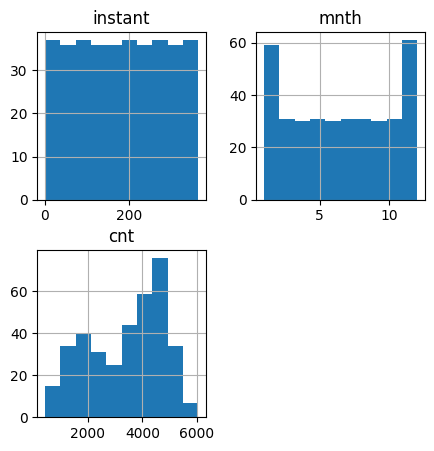

In [31]:
#Checking the distribution of the data
monthly_df.hist(figsize=(5, 5))

###Explore `category_df`

In [32]:
category_df.sample(5)

,instant,dteday,mnth,casual,registered
526,527,6/10/2012,6,2224,4374
453,454,3/29/2012,3,834,5299
305,306,11/2/2011,11,370,3816
479,480,4/24/2012,4,518,5115
70,71,3/12/2011,3,724,1408


In [33]:
#Viewing a summary of statistical parameters
category_df.describe(include="all")

,instant,dteday,mnth,casual,registered
count,731.000000,731,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN
top,NaN,1/1/2011,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN
mean,366.000000,NaN,6.519836,848.176471,3656.172367
std,211.165812,NaN,3.451913,686.622488,1560.256377
min,1.000000,NaN,1.000000,2.000000,20.000000
25%,183.500000,NaN,4.000000,315.500000,2497.000000
50%,366.000000,NaN,7.000000,713.000000,3662.000000
75%,548.500000,NaN,10.000000,1096.000000,4776.500000


In [34]:
category_df.groupby(by='mnth')['casual'].agg(['sum', 'max', 'min', 'mean', 'std'])

,sum,max,min,mean,std
mnth,,,,,
1,12042,1070,9,194.225806,197.384490
2,14963,1435,47,262.508772,232.283549
3,44444,3155,46,716.838710,624.308094
4,60802,3252,120,1013.366667,738.345585
5,75285,3410,255,1214.274194,754.950311
6,73906,2963,477,1231.766667,664.017647
7,78157,3065,562,1260.596774,598.382778
8,72039,2827,226,1161.919355,466.576274
9,70323,3160,118,1172.050000,738.378375


In [36]:
category_df.groupby(by='mnth')['registered'].agg(['sum', 'max', 'min', 'mean', 'std'])

,sum,max,min,mean,std
mnth,,,,,
1,122891,4185,416,1982.112903,1053.274474
2,136389,4546,905,2392.789474,1091.126003
3,184476,5893,491,2975.419355,1513.254354
4,208292,5950,674,3471.533333,1414.571151
5,256401,6433,2213,4135.500000,1093.179612
6,272436,6456,2993,4540.600000,1012.958885
7,266791,6790,2298,4303.080645,1190.542490
8,279155,6541,889,4502.500000,1335.126601
9,275668,6946,1689,4594.466667,1547.716749


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>]], dtype=object)

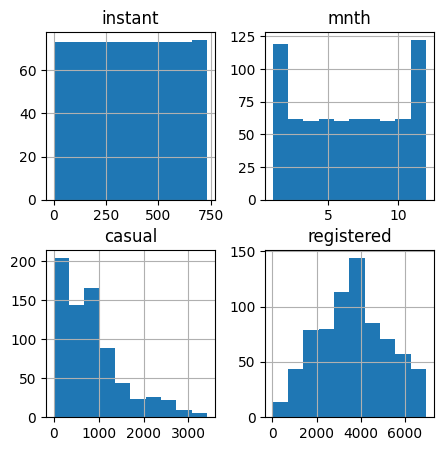

In [38]:
#Checking the distribution of the data
category_df.hist(figsize=(5, 5))

**Insight:**
- Data exploration is conducted by reviewing a summary of statistical parameters, displaying histogram plots, and checking the correlation values among numeric data.
- Casual data exhibits a right-skewed distribution, while registered and count data show a left-skewed distribution; other data exhibit symmetric or zero skewed distributions.
- Some data have correlations close to one, while others are close to zero. The closer the correlation is to zero, the less correlation the data has.

## Visualization & Explanatory Analysis

### What was the trend in the number of bicycle users from January to December 2011?

In [39]:
monthly_df.head()

,instant,dteday,mnth,cnt
0,1,1/1/2011,1,985
1,2,1/2/2011,1,801
2,3,1/3/2011,1,1349
3,4,1/4/2011,1,1562
4,5,1/5/2011,1,1600


<Axes: xlabel='mnth'>

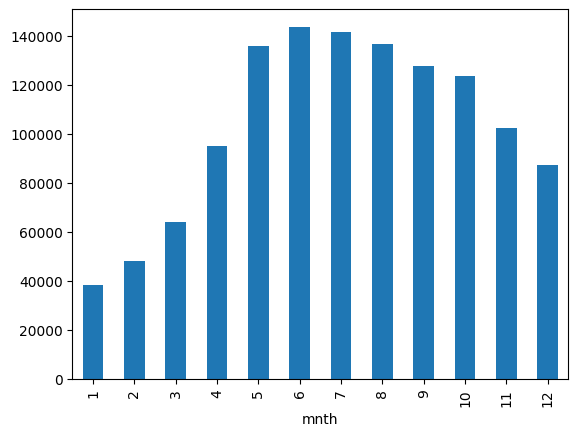

In [41]:
#Data visualization
monthly_df.groupby('mnth')['cnt'].sum().plot(kind='bar')

### - What is the difference in the trend of bicycle users between casual users and registered users throughout 2011?

<Axes: xlabel='mnth'>

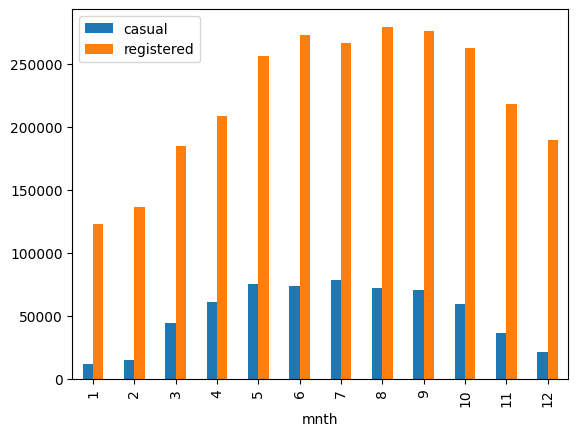

In [42]:
#Data visualization
category_df.groupby('mnth')[['casual', 'registered']].sum().plot(kind='bar')

**Insight:**
- The visualizations for the two questions are displayed in bar plot graphs to observe the trend of bike usage each month throughout the year 2011

## Conclusion

- **Conclusion for Question 1:** The trend of bike usage throughout 2011 experienced both increases and decreases. The highest bike usage occurred in June, while the lowest was in January. Bike usage saw a significant rise between March-April and April-May.

- **Conclusion for Question 2:** Overall, the usage of registered bikes was significantly higher than that of casual bikes. Registered bike users experienced an increase until June, followed by a decline, while casual bike users saw an increase until May, then fluctuated until July before continuing to decline.